
# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


<font color = black> This Tmdb movie dataset includes 10000 movies data. Which includes popularity,revenue,budget,genres and run times. These data matrics help us to understand how successful these movies are in different genres like adventure,action,documantery etc. Whole dataset duration covers 1960 to 2015.


In [61]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [62]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [63]:
#see the columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [64]:
#see the descriptive statistics in dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [65]:
#drop unneccessary columns from dataset
df.drop(['keywords','homepage','tagline','overview','imdb_id','production_companies','budget','revenue','budget_adj','revenue_adj'], axis = 1,inplace=True)

In [66]:
#Check dropped columns 
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [67]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [68]:
#drop null values in columns cast,genres and director
col_null = ['cast','director','genres','vote_average']
df.dropna(subset= col_null,how='any',inplace=True)

In [69]:
#check null values dropped or not 
df.isnull().sum()

id                0
popularity        0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [70]:
#Convert release date to datetime.
df['release_date'] = pd.to_datetime(df['release_date'])


In [71]:
#Check the release data formatting.
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


In [72]:
#add release month in release date
df['release_month'] = df['release_date'].apply(lambda x : x.month_name())

In [73]:
#add release day in release date
df['release_day'] = df['release_date'].apply(lambda x : x.day_name())

In [74]:
#Check changes 
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,release_month,release_day
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,June,Tuesday


In [75]:
#Converting the column into a list of genres by splitting at the pipe symbol
genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')

In [76]:
#divide the runtime in minutes slots
df['runtime_cut'] = pd.cut(df.runtime, bins=[0, 45, 90, 120, 240, 900], labels=['Super-Short', 'Short', 'Average', 'Long', 'Super-long'])

In [77]:
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,release_month,release_day,runtime_cut
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,June,Tuesday,Long


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How have movie production trends varied over the years?)

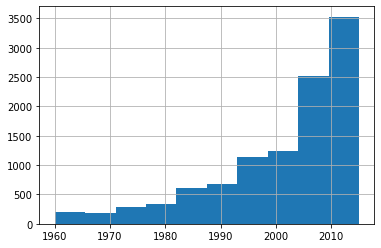

In [78]:
df.release_year.hist();

Histogram representation is about movie production which state that after 2010 movie production has been increased.

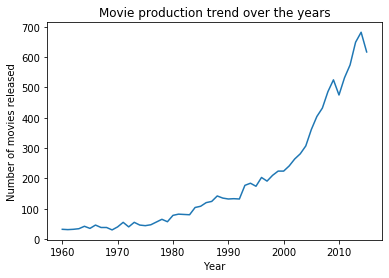

In [79]:
# Number of movies produced each year
movies_per_year= df['release_year'].value_counts().sort_index();

plt.plot(movies_per_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');


In [80]:
#Years with maximum and minimum movie production  
movies_per_year.idxmax() , movies_per_year.idxmin()

(2014, 1969)

Movie production has increased over the years from 1960 to 2015. The decade of 2000 - 2010 shows a steep increase in production compared to previous decades. The year 2014 with 700 movies, is the year of maximum movie production, and 1961 with 31 movies has been the year of least production.

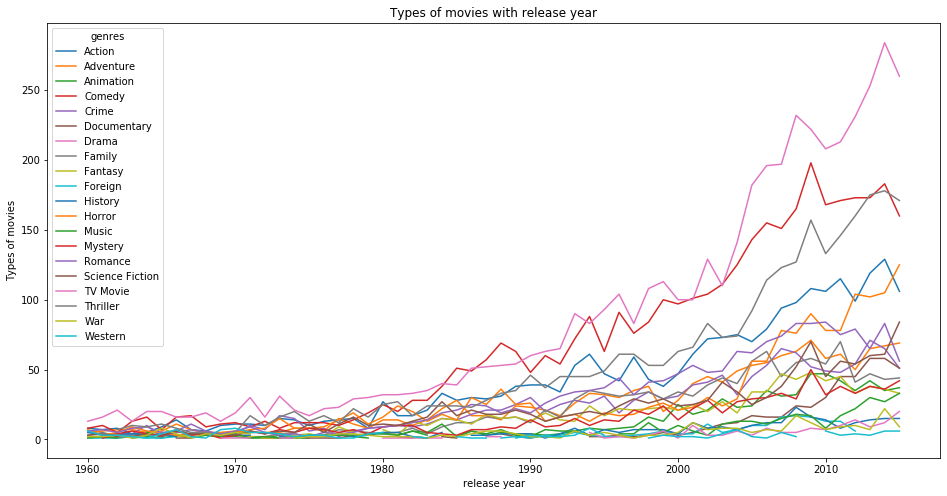

In [81]:
fig, ax = plt.subplots(figsize=(16, 8))
genres.groupby("genres")['release_year'].value_counts().unstack("genres").plot.line(ax=ax);
ax.set_title("Types of movies with release year")
ax.set_xlabel("release year")
ax.set_ylabel("Types of movies");

With the help of above line chart, We could see that genres associated with high popularity movies are drama, comedy, and thriller

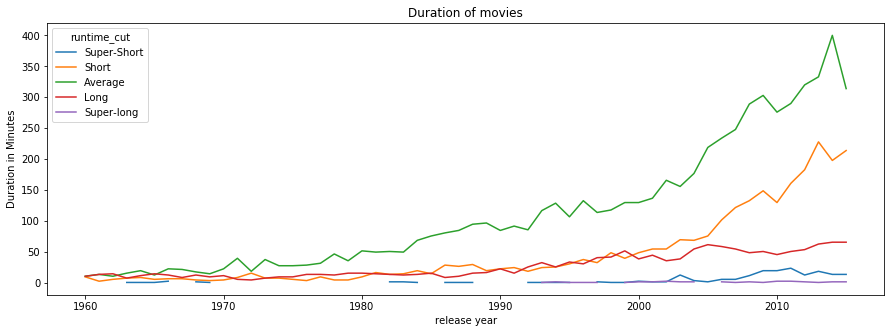

In [82]:
fig, ax = plt.subplots(figsize=(15, 5))
df.groupby("runtime_cut").release_year.value_counts().unstack("runtime_cut").plot.line(ax=ax);
ax.set_title("Duration of movies")
ax.set_xlabel("release year")
ax.set_ylabel("Duration in Minutes");

Above Figure shows that people are liking Average duration movies which covers 90 minutes.

In [83]:
#groupby release day with release year.
release_day = df.groupby("release_day")['release_year'].value_counts().unstack("release_day")#.plot.line(ax=ax);

In [84]:
release_day = release_day.div(release_day.sum(axis=1), axis=0)

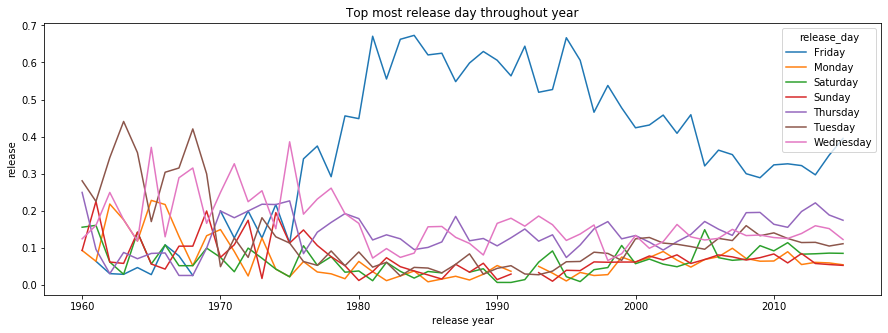

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
release_day.plot.line(ax=ax)
ax.set_title("Top most release day throughout year")
ax.set_xlabel("release year")
ax.set_ylabel("release");

With above chart, we could see that friday has seen the maximum releases through the year.

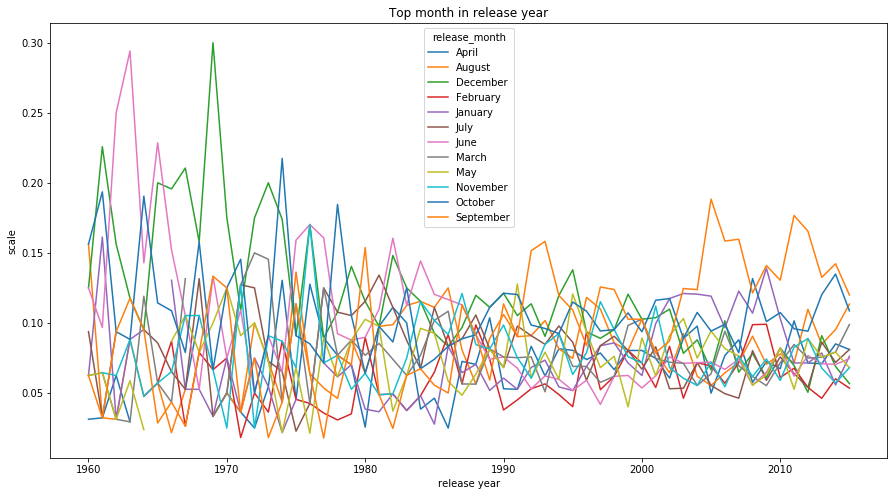

In [86]:
fig, ax = plt.subplots(figsize=(15, 8))
release_month = df.groupby("release_month")['release_year'].value_counts().unstack("release_month")#.plot.line(ax=ax);
release_month = release_month.div(release_month.sum(axis=1), axis=0)
release_month.plot.line(ax=ax);
ax.set_title("Top month in release year")
ax.set_xlabel("release year")
ax.set_ylabel("scale");

December has seen the most releases through out the year.

### Research Question 2  (Which Genre has the highest voting of Movies?)

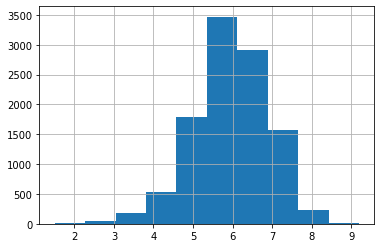

In [98]:
#Histogram for vote average.
df.vote_average.hist();

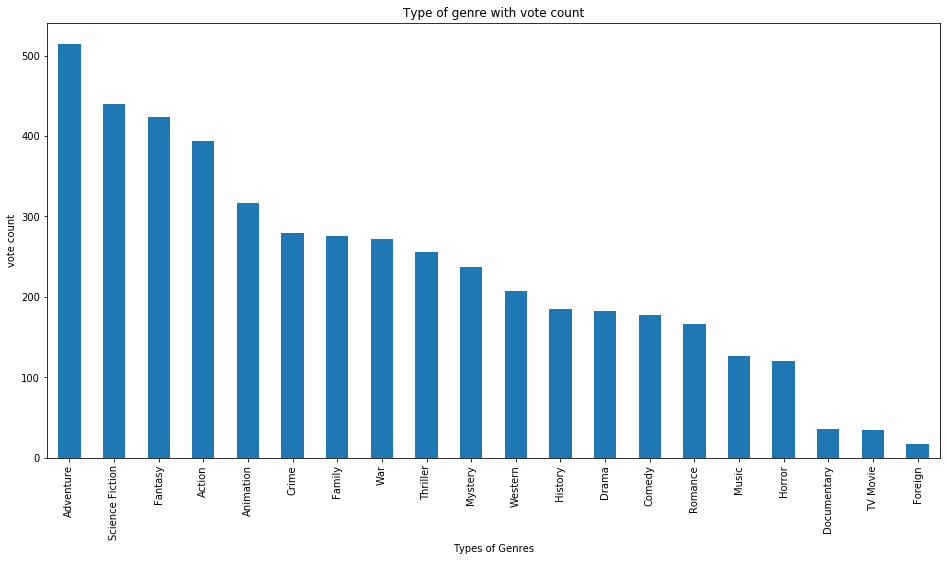

In [89]:
genres.groupby("genres")['vote_count'].mean().sort_values(ascending=False).plot.bar(figsize=(16, 8));
plt.title('Type of genre with vote count');
plt.xlabel('Types of Genres');
plt.ylabel('vote count');

Based on Diagram we could see that Adventure has highest vote count all over genres.

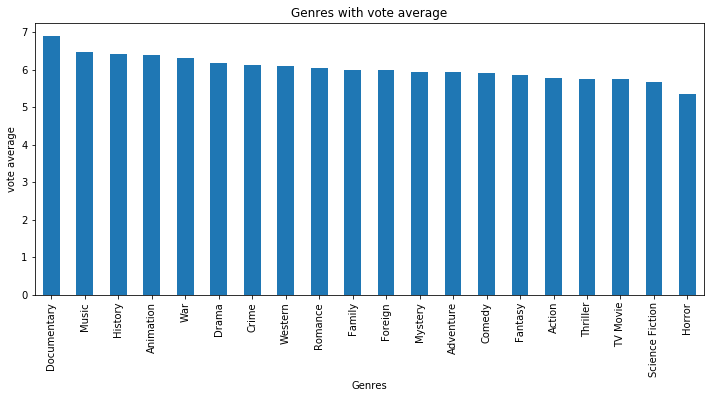

In [90]:
genres.groupby("genres")['vote_average'].mean().sort_values(ascending=False).plot.bar(figsize=(12, 5));
plt.title('Genres with vote average');
plt.xlabel('Genres');
plt.ylabel('vote average');

In vote avergae documentary has seen topmost genre.

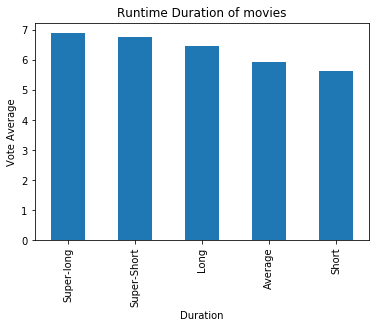

In [91]:
df.groupby("runtime_cut").vote_average.mean().sort_values(ascending=False).plot.bar();
plt.title('Runtime Duration of movies');
plt.xlabel('Duration');
plt.ylabel('Vote Average');

We could see that people like to watch super long duration movies following by super short duration.

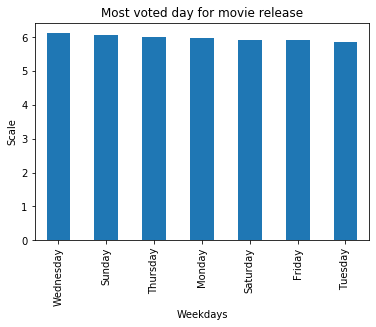

In [92]:
df.groupby("release_day").vote_average.mean().sort_values(ascending=False).plot.bar();
plt.title('Most voted day for movie release');
plt.xlabel('Weekdays');
plt.ylabel('Scale');

In [93]:
df.groupby("release_day").vote_average.mean().sort_values(ascending=False)

release_day
Wednesday    6.117925
Sunday       6.070991
Thursday     5.999046
Monday       5.966819
Saturday     5.914139
Friday       5.913716
Tuesday      5.871124
Name: vote_average, dtype: float64

We could see that wednesday has top vote average in release days.

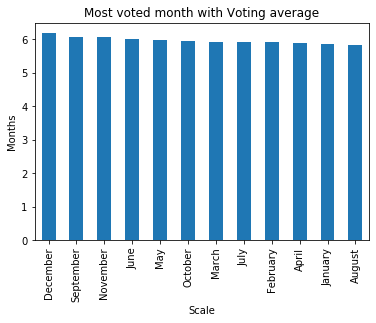

In [94]:
df.groupby("release_month").vote_average.mean().sort_values(ascending=False).plot.bar();
plt.title('Most voted month with Voting average');
plt.xlabel('Scale');
plt.ylabel('Months');

In [95]:
df.groupby("release_month").vote_average.mean().sort_values(ascending=False)

release_month
December     6.179877
September    6.062017
November     6.049123
June         6.006204
May          5.965799
October      5.950088
March        5.916236
July         5.914684
February     5.911307
April        5.866877
January      5.843722
August       5.828918
Name: vote_average, dtype: float64

December has the most voter average during release month.

# Conclusion

<b>How have movie production trends varied over the years?</b>

1. Movie production has increased in 2000-2010 decade and produced maximum movie in 2014 and minimum in 1960.
2. In release year trend Drama,comedy and thriller are most popular genres throughout the years 
2a.Based on investigation Drama genre popularity got decreased from 1970 to 1980 but later on people took interest in it
   and still taking interest.
3. In year wise production, people like to watch average duration movies which are 90 minutes.
4. In day wise Friday has seen most release throughout the year.
5. In month wise December secured highest releases throughout the year.

<b>Which Genre has the highest voting of Movies?</b>

1. In vote count Adventure has highest vote count.
2. Documentary genre scored max vote average throughout all genres
3. People like to vote super long movies either super short duration movies.
4. Wednesday is most likable day to watch movies
5. December is the only month which got most released and voting because of vacations.


# Limitation

During my analysis I have found budget and revenue columns are having zero values which can give false representation of data
even after replace zero with null cannot give correct represenation.